In [1]:
import math

import statistics

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import glob 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
os.chdir("D://Business analytics//Excel class//Python//files")

In [4]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv")) 
append_data = []
for x in csv_files:
    df = pd.read_csv(x)
    df.columns = df.iloc[1]
    df = df.iloc[2:].reset_index(drop= True)
    append_data.append(df)
df_final = pd.concat(append_data)
df_final = df_final[['Date','channelKey', 'ProductKey','UnitCost', 'UnitPrice', 'SalesQuantity','ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'GeographyKey']]

C:\Users\om\AppData\Local\Temp\ipykernel_7220\1259949939.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(x)
C:\Users\om\AppData\Local\Temp\ipykernel_7220\1259949939.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(x)
C:\Users\om\AppData\Local\Temp\ipykernel_7220\1259949939.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(x)


In [5]:
xls = pd.ExcelFile('lookup1.xlsx')
df1 = pd.read_excel(xls, 'Product')
df2 = pd.read_excel(xls, 'Geography')
df3 = pd.read_excel(xls, 'Channel')

In [6]:
df_final[["channelKey",'ProductKey','GeographyKey']]= df_final[["channelKey",'ProductKey','GeographyKey']].astype(int)
df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']] = df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']].astype(float)
df_final1 = pd.merge(df_final,df3,how = "left",left_on='channelKey', right_on='ChannelKey')
df_final1 = pd.merge(df_final1,df2,how = "left",left_on='GeographyKey', right_on='GeographyKey')
df_final1 = pd.merge(df_final1,df1,how = "left",left_on='ProductKey', right_on='ProductKey')
df_final1 = df_final1.drop(columns= ['channelKey','GeographyKey','ProductKey'])

In [7]:
Stat = df_final1[['Date', 'UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']]
Stat = Stat.set_index("Date")
Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']] = Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']].astype(int)

In [8]:
Stat.head()

,UnitCost,UnitPrice,TotalCost,SalesAmount
Date,,,,
01-01-2014,73,159,658,1431
01-01-2014,509,999,1527,2847
01-01-2014,16,32,65,116
01-01-2014,105,230,1903,4128
01-01-2014,1,3,136,268


# Mean

In [12]:
#first we are going to calculate through math library 
numbers = [10,20,30,40,50,60,70,1000]
mean = sum(numbers)/len(numbers)
mean

160.0

In [13]:
#and this one is through statistics library
statistics.mean(numbers)

160

# Median

In [18]:
median = [10,30,20,40,60,80,70,90,100,50]
statistics.median(median)

55.0

In [19]:
median.sort()
median

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [20]:
statistics.median(median)

55.0

In [21]:
#second normal math method to find the median
len(median)//2

5

In [23]:
median[len(median)//2]

60

# Mode

In [24]:
numbers = [10,10,10,10,20,30]

In [25]:
statistics.mode(numbers)

10

In [28]:
numbers= set(numbers)
numbers

{10, 20, 30}

In [32]:
max(set(numbers),key = numbers.count)

AttributeError: 'set' object has no attribute 'count'

# Standard Deviation

In [38]:
SD_1 = [1000,20,30,40,500,20,40,30]

In [39]:
statistics.stdev(SD_1)

359.1656999213594

In [40]:
statistics.mean(SD_1)

210

In [41]:
SD_2 = [10,20,30,40,50,60]

In [42]:
statistics.stdev(SD_2)

18.708286933869708

In [43]:
statistics.variance(SD_2)

350

In [45]:
#Now we are going to work on our dataset
#Gives you the view of how your data is distributed widely
Stat.describe()

,UnitCost,UnitPrice,TotalCost,SalesAmount
count,859505.000000,859505.000000,859505.000000,859505.000000
mean,139.363512,333.347903,1601.002135,3779.815417
std,167.467721,429.194189,2104.667639,5318.017167
min,0.000000,0.000000,1.000000,3.000000
25%,32.000000,69.000000,314.000000,657.000000
50%,84.000000,188.000000,919.000000,2080.000000
75%,204.000000,445.000000,2107.000000,4990.000000
max,960.000000,2899.000000,91411.000000,272718.000000


In [46]:
#to find out the mean sd on the particular column
Stat.UnitCost.mean()

139.36351155607005

In [47]:
SD_3 = [1,1,1,1,1,1,1]

In [48]:
SD_3 = pd.DataFrame(SD_3)

In [49]:
SD_3.describe() #that shows standard deviation 0 because each data point is closely clutsered and no distance between each value

,0
count,7.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [50]:
SD_4 = [2,5,1,1,1,5,3,5,3]
SD_4 = pd.DataFrame(SD_4)

In [51]:
SD_4.describe()

,0
count,9.000000
mean,2.888889
std,1.763834
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


# Graph Plotting

In [53]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [54]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [55]:
Stat.describe()

,UnitCost,UnitPrice,TotalCost,SalesAmount
count,859505.000000,859505.000000,859505.000000,859505.000000
mean,139.363512,333.347903,1601.002135,3779.815417
std,167.467721,429.194189,2104.667639,5318.017167
min,0.000000,0.000000,1.000000,3.000000
25%,32.000000,69.000000,314.000000,657.000000
50%,84.000000,188.000000,919.000000,2080.000000
75%,204.000000,445.000000,2107.000000,4990.000000
max,960.000000,2899.000000,91411.000000,272718.000000


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


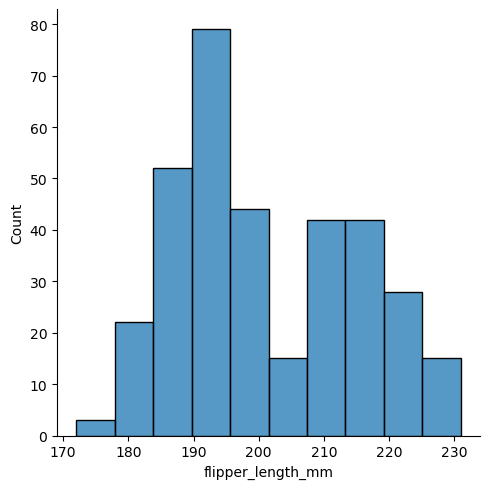

In [56]:
sns.displot(penguins,x="flipper_length_mm")

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


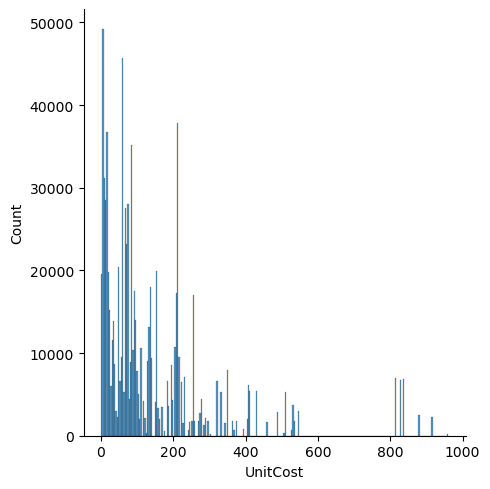

In [57]:
sns.displot(df_final1,x= "UnitCost")

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


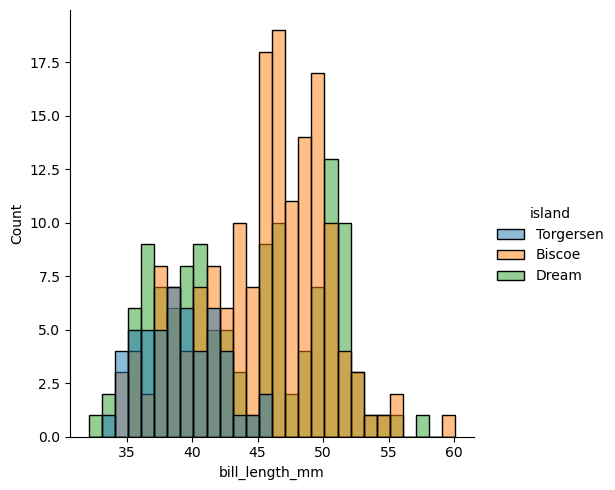

In [61]:
sns.displot(penguins,x ="bill_length_mm",binwidth = 1,hue = "island")

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


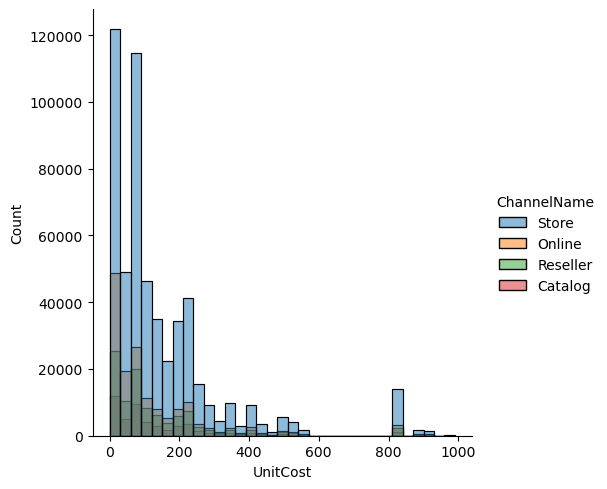

In [64]:
sns.displot(df_final1,x="UnitCost",binwidth =30,hue = "ChannelName")

In [67]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter Plot

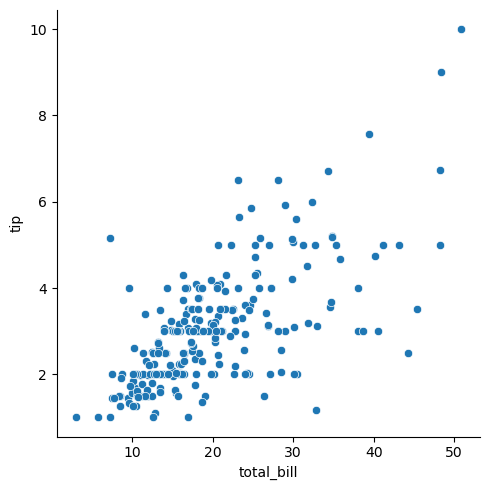

In [68]:
sns.relplot(data = tips,x ="total_bill",y="tip")

In [69]:
df_final1

,Date,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ChannelKey,ChannelName,ContinentName,ProductName,Sub category,Category
0,01-01-2014,73.12,159.00,9.0,0.0,0.00,0.0,0.000,658.08,1431.000,1,Store,North America,Proseware Photo Ink Jet Printer M100 White,"Printers, Scanners & Fax",Computers
1,01-01-2014,509.32,999.00,3.0,1.0,999.00,1.0,149.850,1527.96,2847.150,1,Store,Asia,Litware Washer & Dryer 15.5in E150 Green,Washers & Dryers,Home Appliances
2,01-01-2014,16.31,32.00,4.0,0.0,0.00,7.0,11.200,65.24,116.800,2,Online,North America,MGS Age of Empires II: The Conquerors Expansio...,Download Games,Games and Toys
3,01-01-2014,105.77,230.00,18.0,0.0,0.00,1.0,11.500,1903.86,4128.500,2,Online,North America,"The Phone Company Touch Screen Phones 26-2.2"" ...",Touch Screen Phones,Cell phones
4,01-01-2014,1.71,3.35,80.0,1.0,3.35,0.0,0.000,136.80,268.000,1,Store,North America,Contoso In-Line Coupler E180 Silver,Cell phones Accessories,Cell phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859500,31-12-2016,208.40,629.00,8.0,0.0,0.00,3.0,377.400,1667.20,4654.600,1,Store,Europe,Fabrikam SLR Camera X146 Black,Digital SLR Cameras,Cameras and camcorders
859501,31-12-2016,222.98,673.00,6.0,0.0,0.00,3.0,403.800,1337.88,3634.200,1,Store,North America,Contoso SLR Camera X144 Gold,Digital SLR Cameras,Cameras and camcorders
859502,31-12-2016,123.24,268.00,13.0,0.0,0.00,4.0,214.400,1602.12,3269.600,3,Catalog,North America,"The Phone Company Touch Screen Phones 26-1.4"" ...",Touch Screen Phones,Cell phones
859503,31-12-2016,210.72,635.99,24.0,1.0,635.99,10.0,953.985,5057.28,14309.775,2,Online,Asia,Adventure Works Floor Lamp X1150 Silver,Lamps,Home Appliances


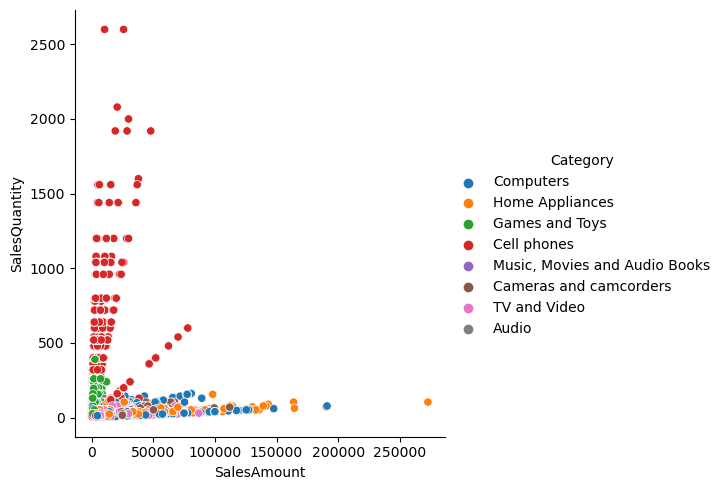

In [74]:
sns.relplot(data = df_final1,x= "SalesAmount", y= "SalesQuantity",hue = "Category")

In [75]:
dowjones = sns.load_dataset("dowjones")
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


# Line Plot|

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


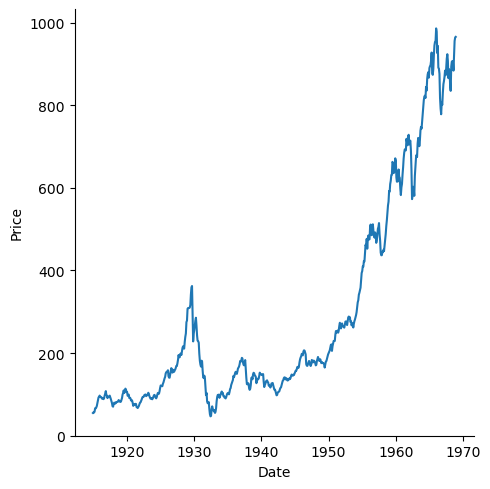

In [76]:
sns.relplot(dowjones,x= "Date",y= "Price", kind = "line")

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'Figure' object has no attribute 'set_inches'

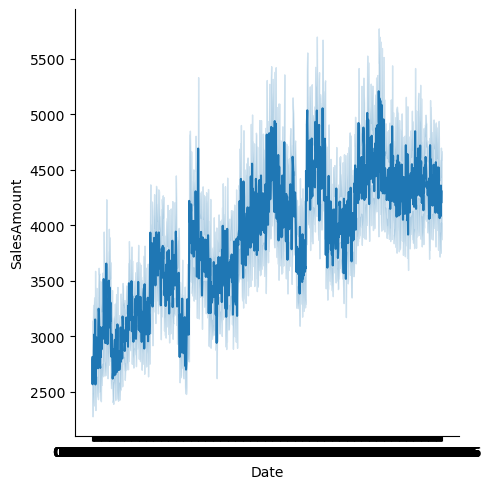

In [77]:
f= sns.relplot(data = df_final1,x = "Date",y = "SalesAmount",kind = "line")
f.fig.set_inches(10,8)